# **COMPUTER REVIEW ASPECT BASED SENTIMENT ANALYSIS**

## **Read Data**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Read SemEval2014 Laptop Review Data

Data from SemEval2014 Task4

In [ ]:
import xml.etree.ElementTree as ET

semeval_labeled_ds = {
    'train_path': '/content/Laptop_Train.xml',
    'test_path': '/content/Laptop_Test.xml',
    'columns': ['text', 'terms'],
    'train_df': None,
    'test_df': None,
}

def read_semeval_labeled_dataset(path):
    tree = ET.parse(path)
    root = tree.getroot()

    labeled_reviews = []
    for sentence in root.findall("sentence"):
        entry = {}
        aterms = []
        if sentence.find("aspectTerms"):
            for aterm in sentence.find("aspectTerms").findall("aspectTerm"):
                aterms.append(aterm.get("term").lower())
        entry["text"], entry["terms"]= sentence[0].text.lower(), aterms
        labeled_reviews.append(entry)
    # labeled_df = pd.DataFrame(labeled_reviews)
    print("there are",len(labeled_reviews),"reviews in this training set")
    return labeled_reviews

semeval_labeled_ds['train_df'] = pd.DataFrame(
    read_semeval_labeled_dataset(semeval_labeled_ds['train_path']),
    columns=semeval_labeled_ds['columns']
)

semeval_labeled_ds['test_df'] = pd.DataFrame(
    read_semeval_labeled_dataset(semeval_labeled_ds['test_path']),
    columns=semeval_labeled_ds['columns']
)

display(semeval_labeled_ds['train_df'].head())
display(semeval_labeled_ds['test_df'].head())

there are 3045 reviews in this training set
there are 800 reviews in this training set


,text,terms
0,i charge it at night and skip taking the cord ...,"[cord, battery life]"
1,i bought a hp pavilion dv4-1222nr laptop and h...,[]
2,the tech guy then said the service center does...,"[service center, ""sales"" team, tech guy]"
3,i investigated netbooks and saw the toshiba nb...,[]
4,the other day i had a presentation to do for a...,[]


,text,terms
0,"boot time is super fast, around anywhere from ...",[boot time]
1,tech support would not fix the problem unless ...,[tech support]
2,but in resume this computer rocks!,[]
3,set up was easy.,[set up]
4,did not enjoy the new windows 8 and touchscree...,"[windows 8, touchscreen functions]"


### Read SemEval2014 Opinion Data

SemEval2014 opinions data annotated by (Wang et al., 2016)

In [ ]:
opinion_labeled_ds = {
    'train_path': '/content/train_laptop',
    'test_path': '/content/test_laptop',
    'columns': ['opinion', 'sentiment'],
    'train_df': None,
    'test_df': None,
}
  
def read_opinion_labeled_dataset(path):
    arr = []
    with open(path) as fp:
        line = fp.readline()
        while line:
            tokens = line.split(',')
            # opinions, sentiments = [], []
            for token in tokens:
                row = token.split()
                if(row[-1] == 'NIL'):
                    row = [np.NaN, np.NaN]
                    # opinions = np.NaN
                    # sentiments = np.NaN
                    # break
                else:
                    # opinions.append(' '.join(row[0:-1]))
                    # sentiments.append(0 if row[-1] == '-1' else int(row[-1]))
                    row = [' '.join(row[0:-1]), int(row[-1])]
                arr.append(row)
            # arr.append([opinions, sentiments])
            # arr.append(row)
            line = fp.readline()
        return arr

def read_opinion_labeled_dataset_per_sentence(path):
    arr = []
    with open(path) as fp:
        line = fp.readline()
        while line:
            row = []
            tokens = line.split(',')
            for token in tokens:
                temp = token.split()
                if(temp[-1] == 'NIL'):
                    temp = ''
                else:
                    temp = ' '.join(temp[0:-1])
                row.append(temp)
            arr.append([row])
            line = fp.readline()
        return arr

opinion_labeled_ds['train_df'] = pd.DataFrame(
    read_opinion_labeled_dataset(opinion_labeled_ds['train_path']),
    columns=opinion_labeled_ds['columns']
)

opinion_labeled_ds['test_df'] = pd.DataFrame(
    read_opinion_labeled_dataset(opinion_labeled_ds['test_path']),
    columns=opinion_labeled_ds['columns']
)

display('train:', opinion_labeled_ds['train_df'].shape)
display('test:', opinion_labeled_ds['test_df'].shape)
display(opinion_labeled_ds['train_df'].head(10))
display(opinion_labeled_ds['test_df'].head(10))

opinion_labeled_ds_per_sentence = {}

opinion_labeled_ds_per_sentence['train_df'] = pd.DataFrame(
    read_opinion_labeled_dataset_per_sentence(opinion_labeled_ds['train_path']), 
    columns=[opinion_labeled_ds['columns'][0]]
)

opinion_labeled_ds_per_sentence['test_df'] = pd.DataFrame(
    read_opinion_labeled_dataset_per_sentence(opinion_labeled_ds['test_path']),
    columns=[opinion_labeled_ds['columns'][0]]
)

display('train:', opinion_labeled_ds_per_sentence['train_df'].shape)
display('test:', opinion_labeled_ds_per_sentence['test_df'].shape)
display(opinion_labeled_ds_per_sentence['train_df'].head(10))
display(opinion_labeled_ds_per_sentence['test_df'].head(10))

'train:'

(3805, 2)

'test:'

(1012, 2)

,opinion,sentiment
0,good,1.0
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,high,1.0
6,stable,1.0
7,expandable,1.0
8,good,1.0
9,easy,1.0


,opinion,sentiment
0,fast,1.0
1,NaN,NaN
2,rocks,1.0
3,easy,1.0
4,enjoy,1.0
5,NaN,NaN
6,lousy,-1.0
7,excellent,1.0
8,NaN,NaN
9,fast,1.0


'train:'

(3048, 1)

'test:'

(800, 1)

,opinion
0,[good]
1,[]
2,[]
3,[]
4,[]
5,"[high, stable, expandable, good, easy, gorgeous]"
6,[easy]
7,[sad]
8,[more]
9,[useless]


,opinion
0,[fast]
1,[]
2,[rocks]
3,[easy]
4,[enjoy]
5,[]
6,[lousy]
7,[excellent]
8,[]
9,"[fast, light, simple]"


In [ ]:
# value counts for df column containing list
def list_val_counts(data):
  display(pd.Series([x for item in data for x in item]).value_counts())
  # display(df.str.split().apply(lambda x: pd.Series(x).value_counts()).sum())
opinion_labeled_ds['train_df']['sentiment'].value_counts()

# list_val_counts(opinion_labeled_ds['train_df']['sentiment'])

 1.0    1701
-1.0     819
Name: sentiment, dtype: int64

In [ ]:
# turn -1 labels to 0s:
# pandas df.replace doesn't work for lists...
# conversion_map = {-1 : 0}
# .map doesn't work because map only returns mapped values
opinion_labeled_ds['train_df']['sentiment'].replace(-1,0, inplace=True)
opinion_labeled_ds['test_df']['sentiment'].replace(-1,0, inplace=True)
opinion_labeled_ds['train_df']['sentiment'].value_counts()
# opinion_labeled_ds['test_df']['sentiment'] = opinion_labeled_ds['test_df']['sentiment'].map(conversion_map)

1.0    1701
0.0     819
Name: sentiment, dtype: int64

### Combine Both Data

In [ ]:
combined_train_df = pd.concat([semeval_labeled_ds['train_df'], opinion_labeled_ds_per_sentence['train_df']], axis=1)
combined_test_df = pd.concat([semeval_labeled_ds['test_df'], opinion_labeled_ds_per_sentence['test_df']], axis=1)

display(combined_train_df.head())
display(combined_test_df.head())

,text,terms,opinion
0,i charge it at night and skip taking the cord ...,"[cord, battery life]",[good]
1,i bought a hp pavilion dv4-1222nr laptop and h...,[],[]
2,the tech guy then said the service center does...,"[service center, ""sales"" team, tech guy]",[]
3,i investigated netbooks and saw the toshiba nb...,[],[]
4,the other day i had a presentation to do for a...,[],[]


,text,terms,opinion
0,"boot time is super fast, around anywhere from ...",[boot time],[fast]
1,tech support would not fix the problem unless ...,[tech support],[]
2,but in resume this computer rocks!,[],[rocks]
3,set up was easy.,[set up],[easy]
4,did not enjoy the new windows 8 and touchscree...,"[windows 8, touchscreen functions]",[enjoy]


## **Preprocess**

Helper funcs

In [ ]:
def check_column_dtypes(df):
  display([df.iloc[:,i].apply(type).value_counts() for i in range(df.shape[1])])

Remove rows with missing values

In [ ]:
# drop rows with NaN values
opinion_labeled_ds['train_df'] = opinion_labeled_ds['train_df'].dropna()
opinion_labeled_ds['test_df'] = opinion_labeled_ds['test_df'].dropna()

print('Data train length without NaN: ', len(opinion_labeled_ds['train_df']))
display(opinion_labeled_ds['train_df'].head(3))
display(opinion_labeled_ds['test_df'].head(3))
# list_val_counts(opinion_labeled_ds['train_df']['sentiment'])
display(opinion_labeled_ds['train_df']['sentiment'].value_counts())
display(opinion_labeled_ds['test_df']['opinion'].value_counts)
display(opinion_labeled_ds['train_df']['opinion'].dtypes)
check_column_dtypes(opinion_labeled_ds['train_df'])
check_column_dtypes(opinion_labeled_ds['test_df'])

Data train length without NaN:  2520


,opinion,sentiment
0,good,1.0
5,high,1.0
6,stable,1.0


,opinion,sentiment
0,fast,1.0
2,rocks,1.0
3,easy,1.0


1.0    1701
0.0     819
Name: sentiment, dtype: int64

<bound method IndexOpsMixin.value_counts of 0            fast
2           rocks
3            easy
4           enjoy
6           lousy
          ...    
1003      optimal
1004    excellent
1005    unmatched
1006       better
1007      smaller
Name: opinion, Length: 678, dtype: object>

dtype('O')

[<class 'str'>    2520
 Name: opinion, dtype: int64, <class 'float'>    2520
 Name: sentiment, dtype: int64]

[<class 'str'>    678
 Name: opinion, dtype: int64, <class 'float'>    678
 Name: sentiment, dtype: int64]

## **Aspect Based Sentiment Analysis**

### Aspect Term Extraction

By Nisrina Yumna K. (13517017)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Get training data into BIO format
from nltk.tokenize import word_tokenize

def get_BIO_tag(sentence, aspects):
    tags = ['O'] * len(sentence)
    for aspect in aspects:
        pre_index = -1
        for word in sentence: 
            if word in word_tokenize(aspect): # 'good' in 'a good place'
                cur_index = sentence.index(word) 
                if pre_index != -1: # in
                    tags[cur_index] = 'I'
                else:                       # begin
                    tags[cur_index] = 'B'
                pre_index = cur_index 
    return tags

def get_POS_tag(sentence):
    pos_tagged_words_nltk = nltk.pos_tag(sentence)
    tags = [w[1] for w in pos_tagged_words_nltk]
    return tags

def get_tagged_df(doc, len):
    data = pd.DataFrame()
    for id in range(len):
        sentence = {}
        sentence['SentenceID'] = id + 1
        sentence['Word'] = word_tokenize(doc['text'][id])  # split text to words
        sentence['POS'] = get_POS_tag(word_tokenize(doc['text'][id]))
        sentence['Tag'] = get_BIO_tag(sentence['Word'], doc['terms'][id])

        # convert each setence to dataframe 
        sentence_df = pd.DataFrame.from_dict(sentence)
        data = data.append(sentence_df, ignore_index=True)
    return data

tagged_train_df = get_tagged_df(combined_train_df, 3045)
tagged_test_df = get_tagged_df(combined_test_df, 800)
display("Train data:", tagged_train_df.head())
display("Test data:", tagged_test_df.head())

'Train data:'

,SentenceID,Word,POS,Tag
0,1,i,JJ,O
1,1,charge,NN,O
2,1,it,PRP,O
3,1,at,IN,O
4,1,night,NN,O


'Test data:'

,SentenceID,Word,POS,Tag
0,1,boot,NN,B
1,1,time,NN,I
2,1,is,VBZ,O
3,1,super,JJ,O
4,1,fast,RB,O


In [ ]:
words = set(list(pd.concat([tagged_train_df, tagged_test_df])['Word'].values))
words.add('PADword')
display(len(words))

tags = list(set(tagged_train_df["Tag"].values))
display(len(tags))

4779

3

In [ ]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("SentenceID").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

getter = SentenceGetter(tagged_train_df)
sentences = getter.sentences # get all sentences
display("Train sentence:", sentences[0])

test_getter = SentenceGetter(tagged_test_df)
test_sentences = test_getter.sentences # get all sentences
display("Test sentence:", test_sentences[0])

'Train sentence:'

[('i', 'JJ', 'O'),
 ('charge', 'NN', 'O'),
 ('it', 'PRP', 'O'),
 ('at', 'IN', 'O'),
 ('night', 'NN', 'O'),
 ('and', 'CC', 'O'),
 ('skip', 'NN', 'O'),
 ('taking', 'VBG', 'O'),
 ('the', 'DT', 'O'),
 ('cord', 'NN', 'B'),
 ('with', 'IN', 'O'),
 ('me', 'PRP', 'O'),
 ('because', 'IN', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('good', 'JJ', 'O'),
 ('battery', 'NN', 'B'),
 ('life', 'NN', 'I'),
 ('.', '.', 'O')]

'Test sentence:'

[('boot', 'NN', 'B'),
 ('time', 'NN', 'I'),
 ('is', 'VBZ', 'O'),
 ('super', 'JJ', 'O'),
 ('fast', 'RB', 'O'),
 (',', ',', 'O'),
 ('around', 'IN', 'O'),
 ('anywhere', 'RB', 'O'),
 ('from', 'IN', 'O'),
 ('35', 'CD', 'O'),
 ('seconds', 'NNS', 'O'),
 ('to', 'TO', 'O'),
 ('1', 'CD', 'O'),
 ('minute', 'NN', 'O'),
 ('.', '.', 'O')]

In [ ]:
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence in train set has {} words'.format(largest_sen))

largest_test_sen = max(len(sen) for sen in test_sentences)
print('biggest sentence in test set has {} words'.format(largest_test_sen))

biggest sentence in train set has 83 words
biggest sentence in test set has 71 words


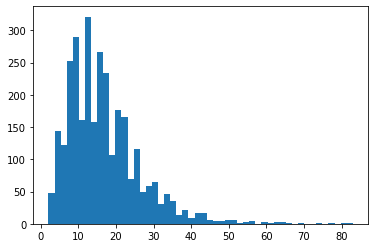

In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(sen) for sen in sentences], bins=50)
plt.show()

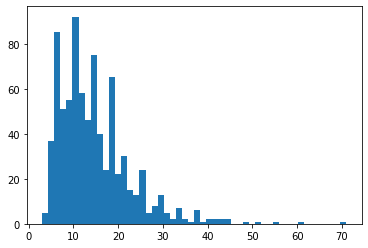

In [ ]:
plt.hist([len(sen) for sen in test_sentences], bins=50)
plt.show()

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_len = 70

tok2idx = {tok: i for i, tok in enumerate(words)}

x_train = [[tok2idx[w[0]] for w in s] for s in sentences]
x_train = pad_sequences(maxlen=max_len, sequences=x_train, padding="post", value=len(words)-1)
display(x_train[0])

x_test = [[tok2idx[w[0]] for w in s] for s in test_sentences]
x_test = pad_sequences(maxlen=max_len, sequences=x_test, padding="post", value=len(words)-1)
display(x_test[0])

array([1177, 1611, 4502, 3029, 2217,  810, 3470, 4692, 4280, 3171, 3771,
        197, 4219,   72, 4280, 2374, 4192, 1976, 2522, 4778, 4778, 4778,
       4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778,
       4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778,
       4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778,
       4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778,
       4778, 4778, 4778, 4778], dtype=int32)

array([4522, 1306, 2069, 1729, 2375, 1453,  136, 3753, 1403, 4415, 2415,
       1814, 3281, 1474, 2522, 4778, 4778, 4778, 4778, 4778, 4778, 4778,
       4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778,
       4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778,
       4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778,
       4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778, 4778,
       4778, 4778, 4778, 4778], dtype=int32)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

tags2index = {t:i for i,t in enumerate(tags)}
display(tags2index)

y_train = [[tags2index[w[2]] for w in s] for s in sentences]
y_train = pad_sequences(maxlen=max_len, sequences=y_train, padding="post", value=tags2index["O"])
y_train = [to_categorical(i, num_classes=len(tags)) for i in y_train]
display(y_train[0])

y_test = [[tags2index[w[2]] for w in s] for s in test_sentences]
y_test = pad_sequences(maxlen=max_len, sequences=y_test, padding="post", value=tags2index["O"])
y_test = [to_categorical(i, num_classes=len(tags)) for i in y_test]
display(y_test[0])

{'B': 0, 'I': 2, 'O': 1}

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model

In [ ]:
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

In [ ]:
input_dim = len(list(words))+1
output_dim = 32
input_length = max_len
n_tags = len(tags)
print('input_dim: ', input_dim, '\noutput_dim: ', output_dim, '\ninput_length: ', input_length, '\nn_tags: ', n_tags)

input_dim:  4780 
output_dim:  32 
input_length:  70 
n_tags:  3


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

def callbacks():
    metric='accuracy'
    mode='max'
    # Learning Rate reduction CB:
    rlr = ReduceLROnPlateau(monitor = metric,
                            factor = 0.2,
                            patience = 10,
                            verbose = 0, 
                            min_delta = 1e-4,
                            min_lr = 1e-6,
                            mode = mode)
    # Model checkpointing to save the BEST model not the LAST model
    ckp = ModelCheckpoint("term_model.h5",
                          monitor = metric,
                          verbose = 0, 
                          save_best_only = True,
                          mode = mode)
    # Early stop when validation metric does not experience improvement after 'patience' epochs
    es = EarlyStopping(monitor = metric,
                       min_delta = 1e-7,
                       patience = 10,
                       mode = mode,
                       baseline = None,
                       restore_best_weights = True,
                       verbose = 0)
    
    return rlr, ckp, es

In [ ]:
term_model = Sequential()

# Add Embedding layer
term_model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

# Add bidirectional LSTM
term_model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

# Add LSTM
term_model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))

# Add timeDistributed Layer
term_model.add(TimeDistributed(Dense(n_tags, activation="relu")))

#Optimiser 
# adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
term_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
term_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 70, 32)            152960    
_________________________________________________________________
bidirectional (Bidirectional (None, 70, 64)            16640     
_________________________________________________________________
lstm_1 (LSTM)                (None, 70, 32)            12416     
_________________________________________________________________
time_distributed (TimeDistri (None, 70, 3)             99        
Total params: 182,115
Trainable params: 182,115
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = term_model.fit(x_train,
                         np.array(y_train),
                         epochs=50,
                         batch_size = 16,
                         verbose=1,
                         callbacks=callbacks())

# term_model.fit(x_train, np.array(y_train), batch_size=32, verbose=1, epochs=1, validation_split=0.2)

Epoch 1/50
191/191 [==============================] - 134s 700ms/step - loss: 0.2112 - accuracy: 0.9731
Epoch 2/50
191/191 [==============================] - 131s 686ms/step - loss: 0.1407 - accuracy: 0.9843
Epoch 3/50
191/191 [==============================] - 129s 676ms/step - loss: 0.1200 - accuracy: 0.9843
Epoch 4/50
191/191 [==============================] - 128s 673ms/step - loss: 0.0645 - accuracy: 0.9844
Epoch 5/50
191/191 [==============================] - 127s 666ms/step - loss: 0.0533 - accuracy: 0.9842
Epoch 6/50
191/191 [==============================] - 127s 664ms/step - loss: 0.0458 - accuracy: 0.9851
Epoch 7/50
191/191 [==============================] - 126s 659ms/step - loss: 0.0408 - accuracy: 0.9657
Epoch 8/50
191/191 [==============================] - 126s 661ms/step - loss: 0.0398 - accuracy: 0.9227
Epoch 9/50
191/191 [==============================] - 126s 662ms/step - loss: 0.0346 - accuracy: 0.9669
Epoch 10/50
191/191 [==============================] - 126s 658m

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training'], loc='lower right')
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.title('model acc')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['training'], loc='upper right')
    plt.show()

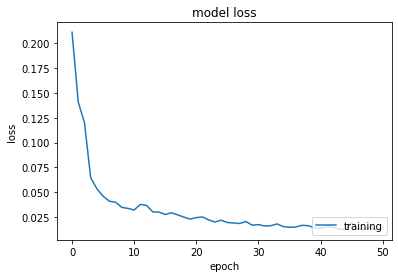

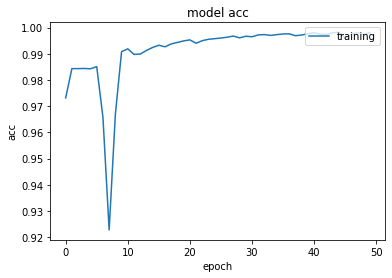

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
idx2tag = {i: w for w, i in tags2index.items()}
display(tags2index)
display(idx2tag)

{'B': 0, 'I': 2, 'O': 1}

{0: 'B', 1: 'O', 2: 'I'}

In [ ]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out

In [ ]:
from sklearn.metrics import classification_report
# from sklearn_crfsuite import metrics

predictions = term_model.predict(x_test)
pred_label = pred2label(predictions)
pred = [j for sub in pred_label for j in sub]
print(pred_label)
y_true = [[np.vectorize(idx2tag.get)(np.argmax(t)).tolist() for t in s] for s in y_test]
true = [j for sub in y_true for j in sub]
print(true[1])

print(classification_report(
    true, pred, labels=['B', 'I']
))

[['B', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'B', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

Convert aspect labellings into list of aspects

In [ ]:
def convert_seq_labels_to_list(flattened_labels, sentence):
  reference = sentence.split()
  idx = 0
  result_list = []
  while(idx < len(flattened_labels)):
    if(flattened_labels[idx].lower() == 'b'): #begin aspect!
      target = reference[idx].lower()
      idx += 1
      while(idx < len(flattened_labels) and flattened_labels[idx].lower() == 'i'):
        target += ' ' + reference[idx].lower()
        idx += 1
      result_list.append(target)
    idx+=1
  return result_list

convert_seq_labels_to_list(['b','i','o','o','o','o','b'], 'Screen quality is very very very good')

['screen quality', 'good']

### Opinion Extraction

By Fithratulhay Pribadi (13517140)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from itertools import chain

import nltk
import sklearn
import scipy.stats
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

!pip install sklearn_crfsuite
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

import random

import pickle

     |████████████████████████████████| 747kB 7.7MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
def get_BIO_tag(sentence, opinions):
    tags = ['O'] * len(sentence)
    for opinion in opinions:
        pre_index = -1
        for word in sentence: 
            if word in word_tokenize(opinion): # 'good' in 'a good place'
                cur_index = sentence.index(word) 
                if pre_index != -1: # in
                    tags[cur_index] = 'I'
                else:                       # begin
                    tags[cur_index] = 'B'
                pre_index = cur_index 
    return tags

def get_POS_tag(sentence):
    pos_tagged_words_nltk = nltk.pos_tag(sentence)
    tags = [w[1] for w in pos_tagged_words_nltk]
    return tags

def get_tagged_df(doc, len):
    data = pd.DataFrame()
    for id in range(len):
        sentence = {}
        sentence['SentenceID'] = id + 1
        sentence['Word'] = word_tokenize(doc['text'][id])  # split text to words
        sentence['POS'] = get_POS_tag(word_tokenize(doc['text'][id]))
        sentence['Aspect'] = get_BIO_tag(sentence['Word'], doc['terms'][id])
        sentence['Tag'] = get_BIO_tag(sentence['Word'], doc['opinion'][id])

        # convert each setence to dataframe 
        sentence_df = pd.DataFrame.from_dict(sentence)
        data = data.append(sentence_df, ignore_index=True)
    return data

opinion_tagged_train_df = get_tagged_df(combined_train_df, 3045)
opinion_tagged_test_df = get_tagged_df(combined_test_df, 800)
display("Train data:", opinion_tagged_train_df.head())
display("Test data:", opinion_tagged_test_df.head())
display(opinion_tagged_train_df.groupby('Tag').size().reset_index(name='counts'))
display(opinion_tagged_test_df.groupby('Tag').size().reset_index(name='counts'))

'Train data:'

,SentenceID,Word,POS,Aspect,Tag
0,1,i,JJ,O,O
1,1,charge,NN,O,O
2,1,it,PRP,O,O
3,1,at,IN,O,O
4,1,night,NN,O,O


'Test data:'

,SentenceID,Word,POS,Aspect,Tag
0,1,boot,NN,B,O
1,1,time,NN,I,O
2,1,is,VBZ,O,O
3,1,super,JJ,O,O
4,1,fast,RB,O,B


,Tag,counts
0,B,63
1,I,11
2,O,51105


,Tag,counts
0,B,615
1,I,53
2,O,11132


In [ ]:
# Fill na
opinion_train_data_fillna = opinion_tagged_train_df.fillna(method='ffill', axis=0)
opinion_test_data_fillna = opinion_tagged_test_df.fillna(method='ffill', axis=0)

# Groupby and collect columns
opinion_train_data_group = opinion_train_data_fillna.groupby( ['SentenceID'],as_index=False)['Word', 'POS', 'Aspect', 'Tag'].agg(lambda x: list(x))
opinion_test_data_group = opinion_test_data_fillna.groupby( ['SentenceID'],as_index=False)['Word', 'POS', 'Aspect', 'Tag'].agg(lambda x: list(x))

# Visualise data
display("train data", opinion_train_data_group.head())
display("test data", opinion_test_data_group.head())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


'train data'

,SentenceID,Word,POS,Aspect,Tag
0,1,"[i, charge, it, at, night, and, skip, taking, ...","[JJ, NN, PRP, IN, NN, CC, NN, VBG, DT, NN, IN,...","[O, O, O, O, O, O, O, O, O, B, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,2,"[i, bought, a, hp, pavilion, dv4-1222nr, lapto...","[NN, VBD, DT, JJ, NN, JJ, NN, CC, VBP, VBN, RB...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,3,"[the, tech, guy, then, said, the, service, cen...","[DT, NN, NN, RB, VBD, DT, NN, NN, VBZ, RB, VB,...","[O, B, I, O, O, O, B, I, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,4,"[i, investigated, netbooks, and, saw, the, tos...","[NN, VBD, NNS, CC, VBD, DT, JJ, NN, .]","[O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O]"
4,5,"[the, other, day, i, had, a, presentation, to,...","[DT, JJ, NN, VB, VBD, DT, NN, TO, VB, IN, DT, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


'test data'

,SentenceID,Word,POS,Aspect,Tag
0,1,"[boot, time, is, super, fast, ,, around, anywh...","[NN, NN, VBZ, JJ, RB, ,, IN, RB, IN, CD, NNS, ...","[B, I, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, B, O, O, O, O, O, O, O, O, O, O]"
1,2,"[tech, support, would, not, fix, the, problem,...","[JJ, NN, MD, RB, VB, DT, NN, IN, JJ, VBD, PRP$...","[B, I, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,3,"[but, in, resume, this, computer, rocks, !]","[CC, IN, NN, DT, NN, VBZ, .]","[O, O, O, O, O, O, O]","[O, O, O, O, O, B, O]"
3,4,"[set, up, was, easy, .]","[VBN, RP, VBD, JJ, .]","[B, I, O, O, O]","[O, O, O, B, O]"
4,5,"[did, not, enjoy, the, new, windows, 8, and, t...","[VBD, RB, VB, DT, JJ, NNS, CD, CC, JJ, NNS, .]","[O, O, O, O, O, B, I, O, B, I, O]","[O, O, B, O, O, O, O, O, O, O, O]"


In [ ]:
def decision(probability):
    return random.randint(0, 100) < probability

drop_sentence = []
for idx in range(opinion_train_data_group.count()[0]):
  temp = opinion_train_data_group['Tag'][idx]
  if (not 'B' in temp) and (not 'I' in temp):
    drop_sentence.append(opinion_train_data_group['SentenceID'][idx])

for sentence_id in drop_sentence:
  opinion_train_data_group = opinion_train_data_group[opinion_train_data_group['SentenceID'] != sentence_id]

print(len(opinion_train_data_group))
opinion_train_data_group.head()

62


,SentenceID,Word,POS,Aspect,Tag
0,1,"[i, charge, it, at, night, and, skip, taking, ...","[JJ, NN, PRP, IN, NN, CC, NN, VBG, DT, NN, IN,...","[O, O, O, O, O, O, O, O, O, B, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
5,6,"[it, is, of, high, quality, ,, has, a, killer,...","[PRP, VBZ, IN, JJ, NN, ,, VBZ, DT, NN, NN, ,, ...","[O, O, O, O, B, O, O, O, O, B, O, O, O, O, O, ...","[O, O, O, B, O, O, O, O, O, O, O, O, O, B, O, ..."
6,7,"[easy, to, start, up, and, does, not, overheat...","[JJ, TO, VB, RP, CC, VBZ, RB, VB, RB, JJ, IN, ...","[O, O, B, I, O, O, O, O, O, O, O, O, O, O]","[B, O, O, O, O, O, O, O, O, O, O, O, O, O]"
7,8,"[sad, very, sad, .]","[JJ, RB, JJ, .]","[O, O, O, O]","[I, O, O, O]"
8,9,"[i, even, got, my, teenage, son, one, ,, becau...","[RB, RB, VBD, PRP$, NN, NN, CD, ,, IN, IN, DT,...","[O, O, O, O, O, O, O, O, O, O, O, B, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [ ]:
def word2features(words, postags, aspects, i):   
    word = words[i]
    postag = postags[i]
    aspect = aspects[i]
    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'word.aspect': aspect,
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = words[i-1]
        postag1 = postags[i-1]
        aspect1 = aspects[i-1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:word.aspect': aspect1,
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True
    
    if i > 1:
        word1 = words[i-2]
        postag1 = postags[i-2]
        aspect1 = aspects[i-2]
        features.update({
            '-2:word.lower()': word1.lower(),
            '-2:word.istitle()': word1.istitle(),
            '-2:word.isupper()': word1.isupper(),
            '-2:word.aspect': aspect1,
            '-2:postag': postag1,
            '-2:postag[:2]': postag1[:2],
        })
    else:
        features['second'] = True
    
    if i < len(words)-1:
        word1 = words[i+1]
        postag1 = postags[i+1]
        is_aspect1 = aspects[i+1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:word.aspect': is_aspect1,
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features

def sent2features(words, postags, aspects):
    return [word2features(words, postags, aspects, i) for i in range(len(words))]

In [ ]:
# %%time
opinion_train_sentences = list(opinion_train_data_group['Word'])
opinion_train_pos = list(opinion_train_data_group['POS'])
opinion_train_aspect = list(opinion_train_data_group['Aspect'])

opinion_X_train = [sent2features(opinion_train_sentences[idx], opinion_train_pos[idx], opinion_train_aspect[idx]) for idx in range(len(opinion_train_sentences))]
opinion_y_train = list(opinion_train_data_group['Tag'])

opinion_test_sentences = opinion_test_data_group['Word']
opinion_test_pos = opinion_test_data_group['POS']
opinion_test_aspect = opinion_test_data_group['Aspect']

opinion_X_test = [sent2features(opinion_test_sentences[idx], opinion_test_pos[idx], opinion_test_aspect[idx]) for idx in range(len(opinion_test_sentences))]
opinion_y_test = list(opinion_test_data_group['Tag'])

In [ ]:
%%time
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)

params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

labels = ['B', 'I']

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

# search
rs = RandomizedSearchCV(crf, params_space,
                        cv=5,
                        verbose=1,
                        n_jobs=-1,
                        n_iter=50,
                        scoring=f1_scorer)
rs.fit(opinion_X_train, opinion_y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   38.7s


CPU times: user 45.2 s, sys: 102 ms, total: 45.3 s
Wall time: 49.1 s


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   49.0s finished


In [ ]:
print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

crf = rs.best_estimator_

opinion_filename = 'opinion_model.sav'
pickle.dump(crf, open(opinion_filename, 'wb'))

best params: {'c1': 0.3246570143419509, 'c2': 0.0003245519286486581}
best CV score: 0.3397696926262143
model size: 0.02M


In [ ]:
opinion_filename = 'opinion_model.sav'
loaded_model = pickle.load(open(opinion_filename, 'rb'))
opinion_y_pred = loaded_model.predict(opinion_X_test)

sorted_labels = sorted(
    labels,
    key=lambda name: (name[1:], name[0])
)

print(metrics.flat_classification_report(
    opinion_y_test, opinion_y_pred, labels=sorted_labels, digits=3
))

              precision    recall  f1-score   support

           B      0.516     0.184     0.271       615
           I      0.000     0.000     0.000        53

   micro avg      0.514     0.169     0.255       668
   macro avg      0.258     0.092     0.135       668
weighted avg      0.475     0.169     0.249       668



In [ ]:
def process_sentence_to_opinion(s, aspect, model_filename):
  doc = pd.DataFrame([s], columns=["text"])
  sentence = pd.DataFrame([aspect], columns=["terms"])
  aspect = pd.DataFrame([['']], columns=["opinion"])
  doc = pd.concat([doc, sentence], axis=1)
  doc = pd.concat([doc, aspect], axis=1)

  print(doc)

  tagged_df = get_tagged_df(doc, 1)
  data_fillna = tagged_df.fillna(method='ffill', axis=0)
  data_group = data_fillna.groupby( ['SentenceID'],as_index=False)['Word', 'POS', 'Aspect', 'Tag'].agg(lambda x: list(x))

  sentences = list(data_group['Word'])
  pos = list(data_group['POS'])
  aspect = list(data_group['Aspect'])

  X = [sent2features(sentences[idx], pos[idx], aspect[idx]) for idx in range(len(sentences))]
  loaded_model = pickle.load(open(model_filename, 'rb'))
  pred = loaded_model.predict(X)
  pred = list(pred)[0]
  print(pred)
  print(s)
  return convert_seq_labels_to_list(pred, s)

### Sentiment Classification

By Abel Stanley (13517068)

In [ ]:
# # Learn a vocabulary dictionary of all tokens in the raw documents.
# from sklearn.feature_extraction.text import CountVectorizer
# transform_bow = CountVectorizer().fit(opinion_labeled_ds['train_df']['opinion'])

# train_bow = transform_bow.transform(opinion_labeled_ds['train_df']['opinion'])


# # Transform a count matrix to a normalized tf or tf-idf representation
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer=TfidfTransformer().fit(train_bow)
# train_tfidf=tfidf_transformer.transform(train_bow)

# train_tfidf.sort_indices()
# train_tfidf= train_tfidf.toarray()

In [ ]:
# Text tokenization: convert sentences into integer encodings
from keras.preprocessing.text import Tokenizer
tokenizer = None

def initTokenizer(data):
    global tokenizer 
    tokenizer = Tokenizer(num_words=data.shape[0])
    # Updates internal vocab based on sentences.
    # Creates a vocabulary index based on word frequency.
    # Lower integer means more frequent word.
    tokenizer.fit_on_texts(data)
    
# def tokenize(data):
#      return tokenizer.texts_to_matrix(data) # transforms each text into a sequence of integers from word_index dictionary

# join train and test
train_test = pd.concat([opinion_labeled_ds['train_df']['opinion'],
                       opinion_labeled_ds['test_df']['opinion']], axis=0)
display(train_test.head())
display(train_test.shape)
initTokenizer(train_test) # initialize tokenizer and create dictionary from training data


# opinion_tokenized = tokenize(opinion_labeled_ds['train_df']['opinion'])
# # sentiment_tokenized = sentiment_tokenized.reshape(sentiment_tokenized.shape[0],1)
# opinion_tokenized = pd.DataFrame(opinion_tokenized)
# display(opinion_tokenized.shape)
# display(opinion_tokenized.head())

# test_opinion_tokenized = pd.DataFrame(tokenize(opinion_labeled_ds['test_df']['opinion']))
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical

# label_encoder_sentiment_analysis = LabelEncoder()
# integer_sentiment = label_encoder_sentiment_analysis.fit_transform(opinion_labeled_ds['train_df']['opinion'])
# dummy_sentiment = to_categorical(integer_sentiment)

0          good
5          high
6        stable
7    expandable
8          good
Name: opinion, dtype: object

(3198,)

In [ ]:
# word embedding
from keras.preprocessing.sequence import pad_sequences

# pad sequences:
max_len = max([len(s.split()) for s in train_test])
display('max_len:', max_len)

# vocab size:
vocab_size = len(tokenizer.word_index) + 1
display('vocab size:', vocab_size)

def tokenize(data):
     return pad_sequences(
        tokenizer.texts_to_sequences(data), # transforms each text into a sequence of integers from word_index dictionary
        maxlen=max_len,
        padding='post'
     )

# create text sequences:
X_train_tokens = tokenize(opinion_labeled_ds['train_df']['opinion'])
X_test_tokens = tokenize(opinion_labeled_ds['test_df']['opinion'])

'max_len:'

8

'vocab size:'

805

In [ ]:
# display(opinion_tokenized.shape)
# # display(dummy_sentiment.shape)
# dummy = pd.DataFrame(opinion_labeled_ds['train_df']['sentiment'])
# display(dummy.shape)
# display(dummy.head)
# display(train_tfidf[0:3])
from sklearn.preprocessing import LabelEncoder

# INT ENCODING
encoder = LabelEncoder()
encoder.fit(opinion_labeled_ds['train_df']['sentiment'])
encoded_Y = encoder.transform(opinion_labeled_ds['train_df']['sentiment'])
int_encoded_Y_test = encoder.transform(opinion_labeled_ds['test_df']['sentiment'])
# display(pd.DataFrame(encoded_Y).head())
# display(encoded_Y.shape)

# ONE HOT ENCODING
# binary encode
# from sklearn.preprocessing import OneHotEncoder
# onehot_encoder = OneHotEncoder(sparse=False)
# encoded_Y = encoded_Y.reshape(len(encoded_Y), 1)
# onehot_encoded = onehot_encoder.fit_transform(encoded_Y)

# int_encoded_Y_test = int_encoded_Y_test.reshape(-1,1)
# onehot_encoded_Y_test = onehot_encoder.fit_transform(int_encoded_Y_test)

In [ ]:
display('X TRAIN AFTER WORD EMBEDDING:')
display(pd.DataFrame(X_train_tokens))
display('X train shape:', X_train_tokens.shape)
display('Y train shape:', encoded_Y.shape)

Handle Imbalanced Class Ratio

Downsampling majority class, Upsampling minority class, or use class weights?

Downsampling technique: Near Miss

Upsampling technique: SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is an over-sampling method. What it does is, it creates synthetic (not duplicate) samples of the minority class. Hence making the minority class equal to the majority class. SMOTE does this by selecting similar records and altering that record one column at a time by a random amount within the difference to the neighbouring records.

Try1: Undersampling

In [ ]:
# Undersample majority class in train dataset
from imblearn.under_sampling import NearMiss

nr = NearMiss()
X_, y_ = nr.fit_sample(X_train_tokens, encoded_Y)
display(pd.DataFrame(y_).value_counts())

val_X_, val_y_ = nr.fit_sample(X_test_tokens, int_encoded_Y_test)
display(pd.DataFrame(val_y_).value_counts())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    819
0    819
dtype: int64

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    129
0    129
dtype: int64

Try2: Upsampling with SMOTE

In [ ]:
# Upsampling minority class in train dataset
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_, y_ = smt.fit_sample(X_train_tokens, encoded_Y)
display(pd.DataFrame(y_).value_counts())

val_X_, val_y_ = smt.fit_sample(X_test_tokens, int_encoded_Y_test)
display(pd.DataFrame(val_y_).value_counts())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    1701
0    1701
dtype: int64

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    549
0    549
dtype: int64

Split train data into train & validation data

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

def splitData(data, label, train_sz, test_sz):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_sz, test_size=test_sz, random_state=0)
    indices = sss.split(data, label)
    train_indices, test_indices = next(indices)
    print("indices form:")
    print(train_indices[0:2])
    
    train_splitted_data, train_splitted_label = data[train_indices], label[train_indices]
    test_splitted_data, test_splitted_label = data[test_indices], label[test_indices]
    print("data form:")
    print(train_splitted_data[0:2])

    print("label form:")
    print(train_splitted_label[0:2])
    
    return(train_splitted_data, train_splitted_label, test_splitted_data, test_splitted_label)
           
# X_, y_, val_X_, val_y_ = splitData(X_, y_, 0.8, 0.2)

In [ ]:
display(X_.shape)
display(y_.shape)
display(pd.DataFrame(y_).value_counts())
display(pd.DataFrame(X_))


(3402, 8)

(3402,)

1    1701
0    1701
dtype: int64

,0,1,2,3,4,5,6,7
0,3,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0
2,190,0,0,0,0,0,0,0
3,390,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3397,222,0,0,0,0,0,0,0
3398,571,0,0,0,0,0,0,0
3399,89,604,0,0,0,0,0,0
3400,143,0,0,0,0,0,0,0


Prepare Training Plotting functions

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model acc')
    plt.ylabel('acc')
    plt.xlabel('epoch') 
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()

Prepare Callbacks

In [ ]:
# Defining callbacks for the model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

def callbacks():
    metric='val_accuracy'
    mode='max'
    # Learning Rate reduction CB:
    rlr = ReduceLROnPlateau(monitor = metric,
                            factor = 0.2,
                            patience = 10,
                            verbose = 0, 
                            min_delta = 1e-4,
                            min_lr = 1e-6,
                            mode = mode)
    # Model checkpointing to save the BEST model not the LAST model
    ckp = ModelCheckpoint("model.h5",
                          monitor = metric,
                          verbose = 0, 
                          save_best_only = True,
                          mode = mode)
    # Early stop when validation metric does not experience improvement after 'patience' epochs
    es = EarlyStopping(monitor = metric,
                       min_delta = 1e-9,
                       patience = 20,
                       mode = mode,
                       baseline = None,
                       restore_best_weights = True,
                       verbose = 0)
    
    return rlr, ckp, es

Define Model Structure

In [ ]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import SpatialDropout1D, PReLU, Flatten, GRU, Dense, Embedding, Activation, BatchNormalization, Dropout, LeakyReLU
import tensorflow as tf

# RESET MODEL LAYER ID
from keras import backend as K
K.clear_session()

dropout_rate = 0.45
batch_size = 32
epochs = 100
EMBEDDING_DIM = int(vocab_size)
units = [100, 100, 100]
dense_act = 'linear'
sentiment_model = Sequential()
sentiment_model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_len))
sentiment_model.add(SpatialDropout1D(dropout_rate))
# need to pair embedding with RNN/Flatten to reduce dimension into 2
# sentiment_model.add(GRU(units=100))
# sentiment_model.add(Dropout(0.25))
# sentiment_model.add(BatchNormalization())
sentiment_model.add(Flatten())
for unit in units:
  # sentiment_model.add(GRU(units=unit, return_sequences=True))
  sentiment_model.add(Dense(unit, activation=dense_act))
  sentiment_model.add(LeakyReLU(alpha=0.25))
  # sentiment_model.add(PReLU())
  sentiment_model.add(Dropout(dropout_rate))
  sentiment_model.add(BatchNormalization())
  dropout_rate += 0.05
# sentiment_model.add(GRU(units=100))
# sentiment_model.add(LeakyReLU(alpha=0.1))
# sentiment_model.add(Dropout(dropout_rate))
# sentiment_model.add(BatchNormalization())
sentiment_model.add(Dense(1, activation='sigmoid'))
# sentiment_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall()])
sentiment_model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

sentiment_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 805)            648025    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 8, 805)            0         
_________________________________________________________________
flatten (Flatten)            (None, 6440)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               644100    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               4

In [ ]:
# sentiment_model.fit(opinion_tokenized, onehot_encoded, epochs=50, verbose=1)
history = sentiment_model.fit(X_,
                    y_,
                    validation_data=(X_test_tokens, int_encoded_Y_test),
                    # validation_data=(val_X_, val_y_),
                    epochs=epochs,
                    batch_size = batch_size,
                    verbose=1,
                    callbacks = callbacks())

Epoch 1/100
107/107 [==============================] - 1s 13ms/step - loss: 0.7914 - accuracy: 0.5564 - val_loss: 0.7050 - val_accuracy: 0.3879
Epoch 2/100
107/107 [==============================] - 1s 11ms/step - loss: 0.3859 - accuracy: 0.8230 - val_loss: 0.3205 - val_accuracy: 0.8555
Epoch 3/100
107/107 [==============================] - 1s 11ms/step - loss: 0.2339 - accuracy: 0.9200 - val_loss: 0.2462 - val_accuracy: 0.8938
Epoch 4/100
107/107 [==============================] - 1s 10ms/step - loss: 0.1796 - accuracy: 0.9339 - val_loss: 0.2543 - val_accuracy: 0.8776
Epoch 5/100
107/107 [==============================] - 1s 9ms/step - loss: 0.1602 - accuracy: 0.9397 - val_loss: 0.2744 - val_accuracy: 0.8673
Epoch 6/100
107/107 [==============================] - 1s 9ms/step - loss: 0.1478 - accuracy: 0.9439 - val_loss: 0.2790 - val_accuracy: 0.8687
Epoch 7/100
107/107 [==============================] - 1s 9ms/step - loss: 0.1445 - accuracy: 0.9444 - val_loss: 0.3195 - val_accuracy: 0.

Plot neural network training graph

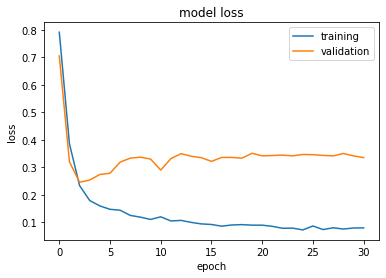

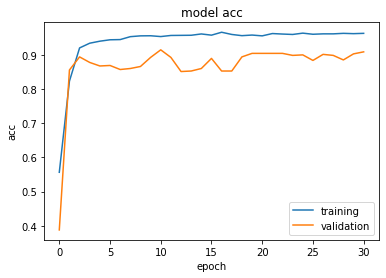

In [ ]:
plot_loss(history)
plot_accuracy(history)

if validation acc curve is lower but is close/similar to training acc curve, then overfitting did not occur.

if validation loss curve is higher but is still close/similar to training loss curve, then overfitting did not occur.

OTHERWISE: overfitting occured.

## **Evaluation**

FOR SENTIMENT ANALYSIS

1. batch size to 16 increased f1-score for 0 labels very slightly (0.1)
2. Upsampling with SMOTE gives better results than Undersampling with NearMiss in this case because the dataset is already small, we rather not cut it any further
3. After handling dataset imbalance, we can now use Accuracy metric (gives best result compared to recall or precision) for model callbacks and training
4. Splitting dataset into validation set results in worse performance on test data... (maybe because the dataset is already small so splitting it is counter-intuitive)
5. Word-embedding gives identical result compared to text-to-matrix approach while being dense representation (lesser memory space) compared to the latter which is sparse representation.
6. Handling imbalance of Validation dataset with SMOTE or NearMiss results in WORSE PERFORMANCE!


In [ ]:
# predict classes -> predict classes with threshold (for sigmmoid), else it will result in continuous values
from sklearn.metrics import classification_report
# predictions_ = sentiment_model.predict_classes(X_test_tokens)
# print(classification_report(y_true=int_encoded_Y_test, y_pred=predictions_))

# load best model:
from keras.models import load_model
final_sentiment_model = load_model('model.h5') 
predictions = final_sentiment_model.predict_classes(X_test_tokens)

print(classification_report(y_true=int_encoded_Y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       129
           1       0.94      0.95      0.95       549

    accuracy                           0.91       678
   macro avg       0.87      0.85      0.86       678
weighted avg       0.91      0.91      0.91       678



In [ ]:
for x,y in zip(predictions, int_encoded_Y_test):
  print(x, 'vs.', y)

**INFERENCE**

In [ ]:
import spacy
import pandas as pd
nlp = spacy.load('en')



from nltk import Tree
def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_

def show_dependency_tree(doc):
  print([to_nltk_tree(sent.root).pretty_print() for sent in doc.sents])

def print_dependency_tokens(doc):
  for tok in doc:
      print(tok.i, tok, "[", tok.dep_, "]")

def infer_aspect_opinion_pairings(sentence):
  doc = nlp(
      sentence
      # 'Great laptop that offers many great features!'
  )
  print('Sentence:', sentence)
  # print_dependency_tokens(doc)
  # show_dependency_tree(doc)
  pairings = []
  # Get list of compounds in doc
  for tok in [tok for tok in doc if tok.dep_ in [ 'amod', 'acomp', 'conj']]: 
      idx = 0
      # search nearby word modifier upwards on the tree
      while(tok.head.i + idx < len(doc) 
            and doc[tok.head.i + idx].dep_ not in ['compound','dobj', 'pobj', 'xcomp']):
          idx += 1
          
      if(tok.head.i + idx < len(doc)):
          aspect = str(doc[tok.i]).lower()
          if(doc[tok.i].dep_ == 'compound'):
            aspect += ' '+str(doc[tok.i+1]).lower()
          pair = [aspect.strip()]
          # print('curr: ', doc[tok.i+idx], '|', doc[tok.i+idx].dep_ )
          # print('up: ', doc[tok.i+1],'|', doc[tok.i+1].dep_ )
          # print('next: ', doc[tok.i+idx+1],'|', doc[tok.i+idx+1].dep_ )
          addition_left = ""
          addiction_right= ""
          # if(doc[tok.i+1].dep_ == 'nsubj'):
          #   addiction_right = str(doc[tok.i+1])
          if(tok.i+idx+1 < len(doc) and (doc[tok.i+idx+1].dep_ == 'compound')):
              addition_left = str(doc[tok.i+idx+1]).lower()
          pair.append('{} {} {}'.format(addition_left, doc[tok.head.i+idx], addiction_right).strip())
          # print(pair)
          pairings.append(pair)

  # reverse search:
  for tok in [tok for tok in reversed(doc) if tok.dep_ in ['compound', 'amod', 'acomp', 'conj']]: 
      # print("R", tok)
      idx = 1
      # search nearby word modifier upwards on the tree
      while(tok.head.i - idx >= 0 
            and doc[tok.head.i - idx].dep_ not in ['compound','dobj', 'pobj', 'xcomp', 'nsubj']):
          idx += 1
          
      if(tok.head.i - idx >= 0):
          aspect = str(doc[tok.i]).lower()
          if(doc[tok.i].dep_ == 'compound'):
            if(doc[tok.i-1].dep_ != 'det'):
              aspect += ' '+str(doc[tok.i-1]).lower()
          pair = [aspect.strip()]
          # print('curr: ', doc[tok.i+idx], '|', doc[tok.i+idx].dep_ )
          # print('up: ', doc[tok.i+1],'|', doc[tok.i+1].dep_ )
          # print('next: ', doc[tok.i+idx+1],'|', doc[tok.i+idx+1].dep_ )
          addition_left = ""
          addiction_right= ""
          # if(doc[tok.i+1].dep_ == 'nsubj'):
          #   addiction_right = str(doc[tok.i+1])
          if(tok.i-idx-1 >= 0 and (doc[tok.i-idx-1].dep_ == 'compound' or doc[tok.i-idx-1].dep_ == 'nsubj')):
              if(doc[tok.i-idx-1] !=  doc[tok.head.i-idx]):
                addition_left = str(doc[tok.i-idx-1]).lower()
          if( doc[tok.head.i-idx] == doc[tok.i]):
            continue
          
          aspect = str(doc[tok.head.i-idx])
          if(aspect.lower() in ['it', 'that']):
            continue
          pair.append('{} {} {}'.format(addition_left, aspect, addiction_right).strip())
          # print(pair)
          pairings.append(pair)
  return pairings


pairings = infer_aspect_opinion_pairings('This laptop has a very slow boot time')
print(pairings)

Sentence: This laptop has a very slow boot time
[['slow', 'boot time'], ['slow', 'boot']]


Pipeline for Aspect Inference Model

In [ ]:
# Pipeline for aspect inference model:
def vectorize_for_ate(s):
    max_len = 70

    tok2idx = {tok: i for i, tok in enumerate(words)}
    s_ = s.split()
    print('s_',s_)
    token = [[tok2idx[w] for w in s_]]
    vector = pad_sequences(maxlen=max_len, sequences=token, padding="post", value=len(words)-1)
    return vector

def infer_aspects(sentence):
  term_model = load_model('term_model_15.h5')
  predictions = term_model.predict(vectorize_for_ate(sentence.lower()))
  pred_label = pred2label(predictions)
  pred = [j for sub in pred_label for j in sub]
  print('pred:', pred)
          
  return convert_seq_labels_to_list(pred, sentence)

Pipeline for Opinion Inference Model

In [ ]:
from collections import defaultdict

def infer_sentiment_from_word(word):
  token = tokenize([word]) # word has to be converted into an array or it will be tokenized PER char not TEXT
  # print(token)
  prediction = final_sentiment_model.predict_classes(token)
  return prediction[0][0]

def analyze_sentence(sentence, score_dict):
  pairings = infer_aspect_opinion_pairings(sentence)
  # ASPECTS INFERRED:
  # aspects = ['features']
  # aspects = infer_aspects(sentence)
  # print('aspects:', aspects)
  # OPINIONS INFERRED:
  # opinions = ['great']
  # print(pairings)
  for pair in pairings:
    # print(pair)
    # if(pair[1] in aspects and pair[0] in opinions):
    sentiment_val = 1 if infer_sentiment_from_word(str(pair[0])) == 1 else -1
    sentiment = 'Positive' if sentiment_val == 1 else 'Negative'
    print(' - ',pair[1], 'aspect is ', sentiment, ' from the opinion ', str(pair[0]))
    score_dict[pair[1]] += sentiment_val

def analyze_reviews(product_name, text_array):
  score_dict = defaultdict(lambda:0) # default value = 0
  print('Reviews for', product_name, "indicates...")
  for sentence in text_array:
    analyze_sentence(sentence, score_dict)
  # print('Overall sentiment score is:', product_score)
  print('From overall reviews, Scores per aspects:')
  total_score = 0
  for aspect, sentiment_score in score_dict.items():
    total_score += sentiment_score
    print(' -', aspect, 'aspect gets', sentiment_score)
  print('TOTAL SCORE for', product_name, 'IS:', total_score)

reviews_data = {
    'LAPTOP ACER' : [
        'Great laptop that offers many great features',
        'This laptop has a very slow boot time',
        'Tech Support would not fix the problem unless I bought your plan for 150 plus',
        'The setup was easy',
        "it is fast light and simple to use"
    ]
}

def analyze_product(product_name):
  analyze_reviews(product_name, reviews_data[product_name])



  

In [ ]:
analyze_product('LAPTOP ACER')

Reviews for LAPTOP ACER indicates...
Sentence: Great laptop that offers many great features
 -  features aspect is  Positive  from the opinion  great
 -  features aspect is  Positive  from the opinion  many
 -  features aspect is  Positive  from the opinion  great
Sentence: This laptop has a very slow boot time
 -  boot time aspect is  Negative  from the opinion  slow
 -  boot aspect is  Negative  from the opinion  slow
Sentence: Tech Support would not fix the problem unless I bought your plan for 150 plus
Sentence: The setup was easy
 -  setup aspect is  Positive  from the opinion  easy
Sentence: it is fast light and simple to use
 -  use aspect is  Positive  from the opinion  fast
 -  use aspect is  Positive  from the opinion  simple
From overall reviews, Scores per aspects:
 - features aspect gets 3
 - boot time aspect gets -1
 - boot aspect gets -1
 - setup aspect gets 1
 - use aspect gets 2
TOTAL SCORE for LAPTOP ACER IS: 4


# COMPARISON WITH RELATED WORKS: Joshi et al.

## ABOUT:** ASPECT to OPINION MAPPING**


In [ ]:
def apply_extraction(sentence,nlp):
    review_body = sentence

    doc=nlp(review_body)


    ## FIRST RULE OF DEPENDANCY PARSE -
    ## M - Sentiment modifier || A - Aspect
    ## RULE = M is child of A with a relationshio of amod
    rule1_pairs = []
    for token in doc:
        if token.dep_ == "amod":
            rule1_pairs.append((token.head.text, token.text))
            #return row['height'] * row['width']


    ## SECOND RULE OF DEPENDANCY PARSE -
    ## M - Sentiment modifier || A - Aspect
    #Direct Object - A is a child of something with relationship of nsubj, while
    # M is a child of the same something with relationship of dobj
    #Assumption - A verb will have only one NSUBJ and DOBJ

    rule2_pairs = []
    for token in doc:
        children = token.children
        A = "999999"
        M = "999999"
        for child in children :
            if(child.dep_ == "nsubj"):
                A = child.text
            if(child.dep_ == "dobj"):
                M = child.text
        if(A != "999999" and M != "999999"):
            rule2_pairs.append((A, M))


    ## THIRD RULE OF DEPENDANCY PARSE -
    ## M - Sentiment modifier || A - Aspect
    #Adjectival Complement - A is a child of something with relationship of nsubj, while
    # M is a child of the same something with relationship of acomp
    #Assumption - A verb will have only one NSUBJ and DOBJ

    rule3_pairs = []

    for token in doc:

        children = token.children
        A = "999999"
        M = "999999"
        for child in children :
            if(child.dep_ == "nsubj"):
                A = child.text

            if(child.dep_ == "acomp"):
                M = child.text

        if(A != "999999" and M != "999999"):
            rule3_pairs.append((A, M))

    ## FOURTH RULE OF DEPENDANCY PARSE -
    ## M - Sentiment modifier || A - Aspect

    #Adverbial modifier to a passive verb - A is a child of something with relationship of nsubjpass, while
    # M is a child of the same something with relationship of advmod

    #Assumption - A verb will have only one NSUBJ and DOBJ

    rule4_pairs = []
    for token in doc:


        children = token.children
        A = "999999"
        M = "999999"
        for child in children :
            if(child.dep_ == "nsubjpass"):
                A = child.text

            if(child.dep_ == "advmod"):
                M = child.text

        if(A != "999999" and M != "999999"):
            rule4_pairs.append((A, M))


    ## FIFTH RULE OF DEPENDANCY PARSE -
    ## M - Sentiment modifier || A - Aspect

    #Complement of a copular verb - A is a child of M with relationship of nsubj, while
    # M has a child with relationship of cop

    #Assumption - A verb will have only one NSUBJ and DOBJ

    rule5_pairs = []
    for token in doc:
        children = token.children
        A = "999999"
        buf_var = "999999"
        for child in children :
            if(child.dep_ == "nsubj"):
                A = child.text

            if(child.dep_ == "cop"):
                buf_var = child.text

        if(A != "999999" and buf_var != "999999"):
            rule3_pairs.append((A, token.text))

    aspects = []
    aspects = rule1_pairs + rule2_pairs + rule3_pairs +rule4_pairs +rule5_pairs
    return aspects

In [ ]:
def reverseTuple(lstOfTuple):     
    return [tuple(reversed(tup)) for tup in lstOfTuple]

# apply_extraction('Great laptop that offers many great features!', nlp)
for sentence in reviews_data['LAPTOP ACER']:
  print('OURS: ', infer_aspect_opinion_pairings(sentence))
  print('THEIRS: ', reverseTuple(apply_extraction(sentence, nlp)))

Sentence: Great laptop that offers many great features!
OURS:  [['Great', ' features '], ['many', ' features '], ['great', ' features ']]
THEIRS:  [('Great', 'laptop'), ('many', 'features'), ('great', 'features'), ('features', 'that')]
Sentence: This laptop has a very slow boot time
OURS:  [['slow', 'boot time '], ['slow', ' boot ']]
THEIRS:  [('slow', 'time'), ('time', 'laptop')]
Sentence: Tech Support would not fix the problem unless I bought your plan for $150 plus.
OURS:  []
THEIRS:  [('problem', 'Support'), ('plan', 'I')]
Sentence: The setup was easy.
OURS:  [['easy', ' setup ']]
THEIRS:  [('easy', 'setup')]
Sentence: it's fast, light, and simple to use.
OURS:  [['fast', ' use '], ['light', ' use '], ['simple', ' use ']]
THEIRS:  [('fast', 'it')]
